In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
% matplotlib inline

In [2]:
!pwd

/Users/jingang/PycharmProjects/RL_Lite/Test


In [3]:
sys.path.append('/Users/jingang/PycharmProjects/RL_Lite')

In [4]:
from Simulation import Ornstein_Uhlenbeck
from Simulation import Generic_functions
from Data import Trade_book
from Data import Player
from Model import Strategy
from Model import SLA

In [5]:
ou = Ornstein_Uhlenbeck()
trade_cost = lambda x: Generic_functions.trading_cost(x, 10, 0.1)
utility_func = lambda x: Generic_functions.utility_function(x, 0.0001)
sla = SLA()
strat = Strategy(sla)

In [6]:
p1 = Player(price_process= ou, utility_function=utility_func, trading_cost=trade_cost, strategy=strat)

In [7]:
start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.95)
p1.update_strategy(250000, 1)    
end = time.time()  
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.75)
p1.update_strategy(250000, 1)
end = time.time()
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.25)
p1.update_strategy(250000, 1)   
end = time.time()
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.05)
p1.update_strategy(250000, 1)    
end = time.time()
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.01)
p1.update_strategy(250000, 1)
end = time.time()
print('time used is', end - start)

start = time.time()
for i in range(250000):
    p1.trade_greedy_one_step(.01)
p1.update_strategy(250000, 1) 
end = time.time()
print('time used is', end - start)

250001
accuracy is :  0.261786342196
time used is 10.383300304412842
250001
accuracy is :  0.452703793038
time used is 44.75338006019592
250001
accuracy is :  0.484085485773
time used is 110.97771191596985
250001
accuracy is :  0.455089596262
time used is 167.7966639995575
250001
accuracy is :  0.457659871838
time used is 209.3059389591217
250001
accuracy is :  0.481956809982
time used is 256.5787787437439


In [8]:
a = np.linspace(start=0,stop=100,num=41)
b = []
for i in a:
    b.append(p1.strategy.learner.predict((i,0),[200, 100, 0, -100, -200]))

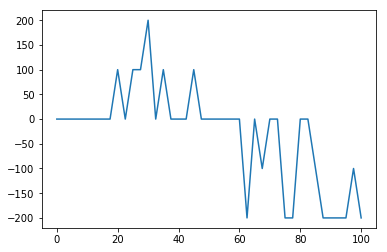

In [9]:
plt.plot(a,b)

In [10]:
price = np.linspace(start=0,stop=100,num=21)
q200 = []
q100 = []
q0 = []
qn100 = []
qn200 = []

In [11]:
pos = 0
for p in price:
    q200.append(p1.strategy.learner.qval((p, pos),[200]))
    q100.append(p1.strategy.learner.qval((p, pos),[100]))
    q0.append(p1.strategy.learner.qval((p, pos),[0]))
    qn100.append(p1.strategy.learner.qval((p, pos),[-100]))
    qn200.append(p1.strategy.learner.qval((p, pos),[-200]))

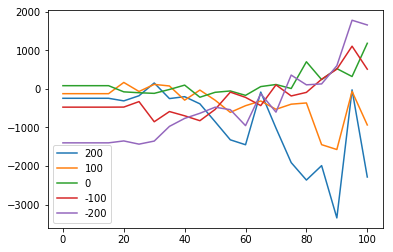

In [12]:
plt.figure
plt.plot(price, q200, label = '200')
plt.plot(price, q100, label = '100')
plt.plot(price, q0, label = '0')
plt.plot(price, qn100, label = '-100')
plt.plot(price, qn200, label = '-200')
plt.legend(loc=0)